<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1916 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None
        Local Route    Light Rail  Peak Service   Rapid Route       School  \
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
min        1.000000      0.000000      0.000000      0.000000     0.000000   
25%     3044.500000   4463.500000      0.000000 

<ipython-input-9-5886bd9d44c6>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # forward fill as an example


<Figure size 1400x800 with 0 Axes>

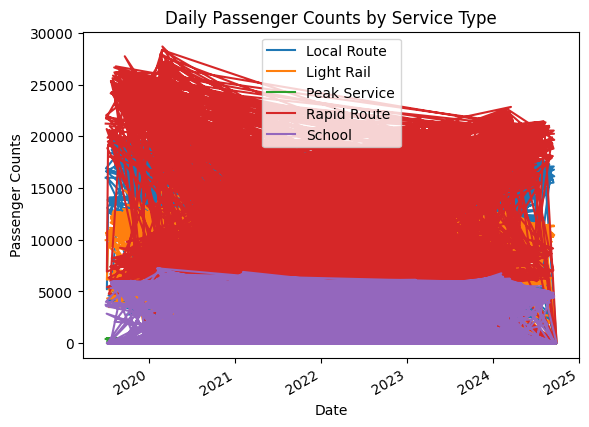

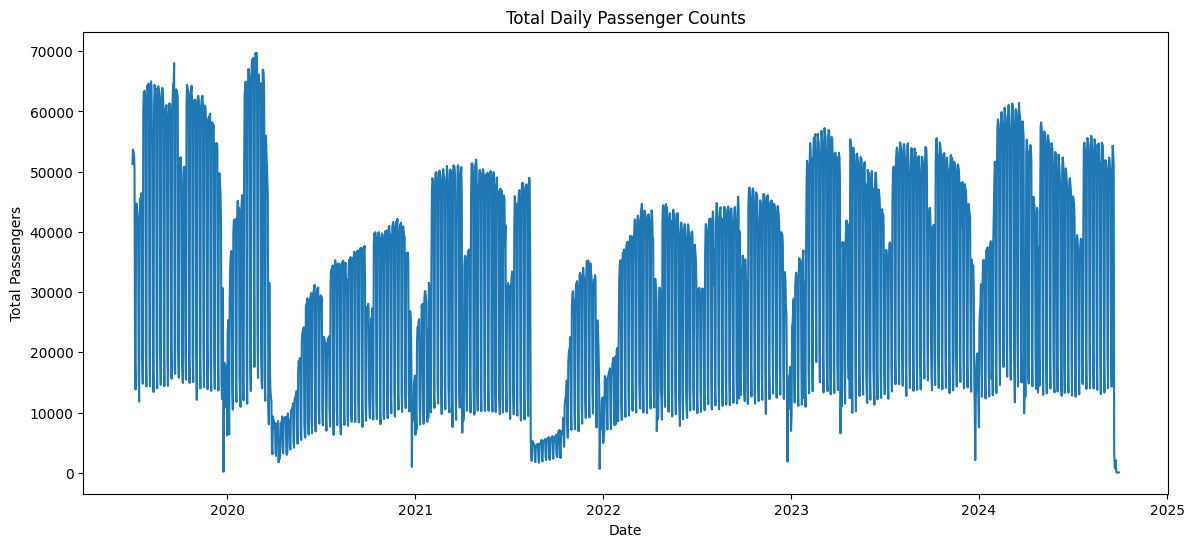

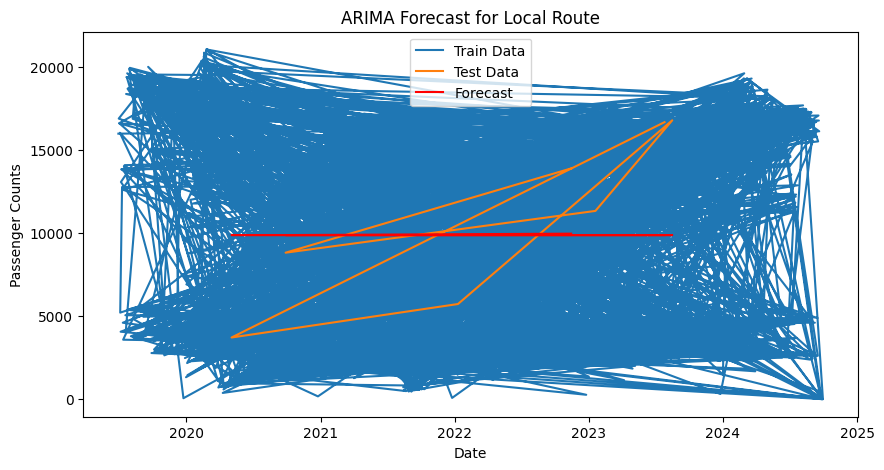

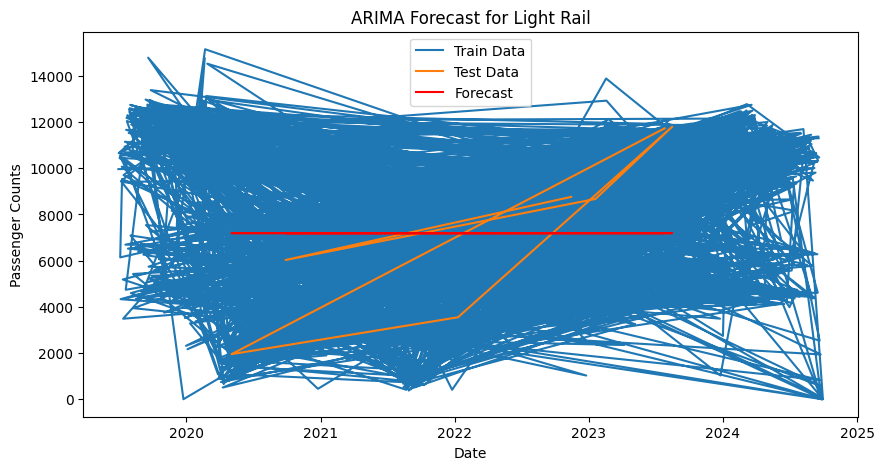

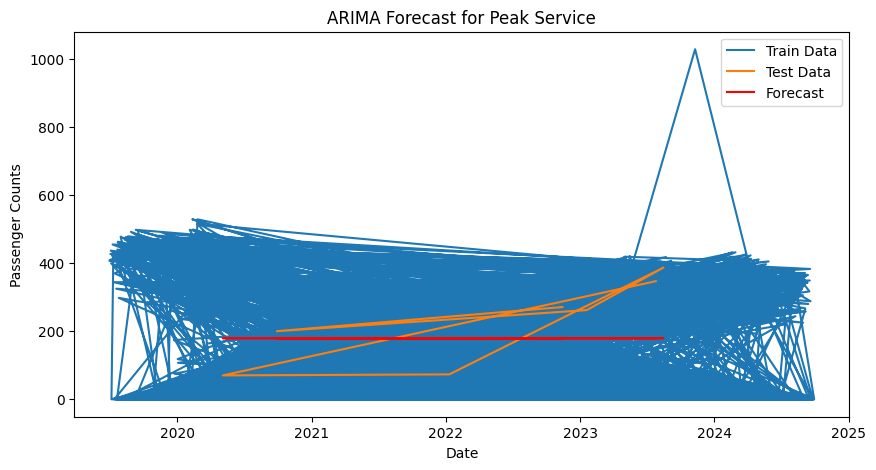

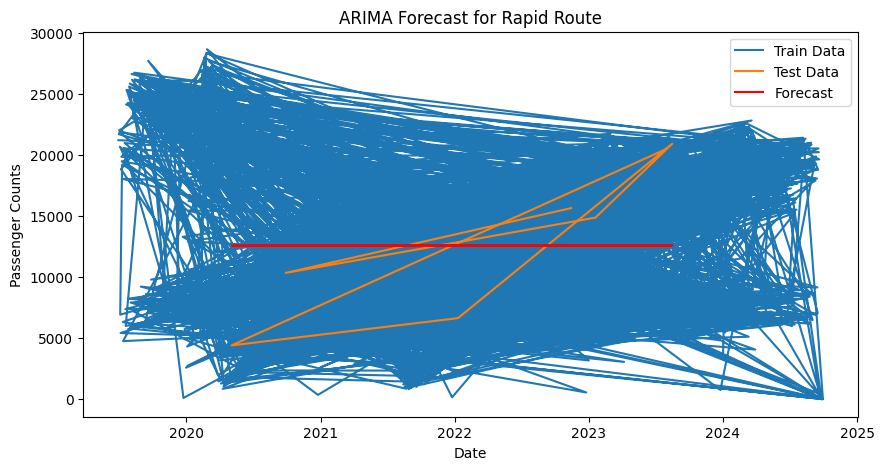

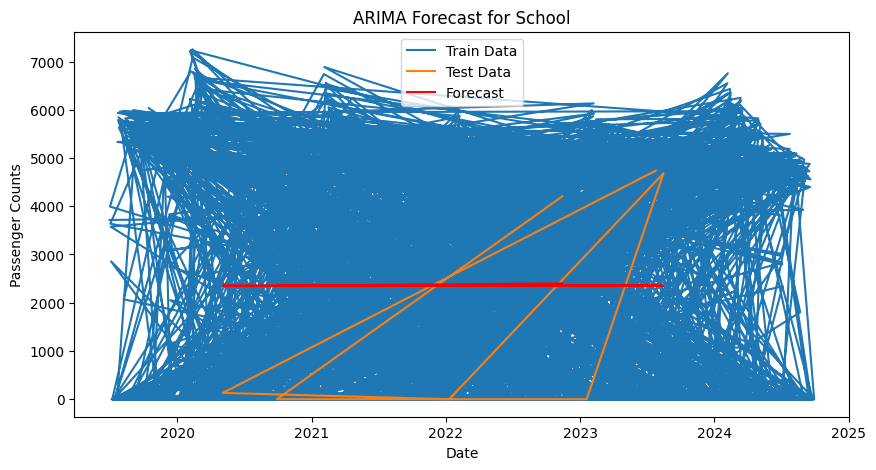

,predicted_mean
1911,2400.603011
1912,2352.134583
1913,2353.113165
1914,2353.093408
1915,2353.093807
1916,2353.093798
1917,2353.093799


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the file path if needed)
df = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241028.csv')

# Overview of the data
print(df.info())
print(df.describe())
print(df.head())

# Handling missing values (if any)
df = df.fillna(method='ffill')  # forward fill as an example

# Convert date column to datetime (adjust column name if necessary)
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.set_index('Date', inplace=True)

# Plot the passenger counts over time for each service type
plt.figure(figsize=(14, 8))
df.plot(y=['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School'])
plt.title("Daily Passenger Counts by Service Type")
plt.xlabel("Date")
plt.ylabel("Passenger Counts")
plt.legend()
plt.show()

# Finding and visualizing peak travel days
daily_passenger_count = df.sum(axis=1)
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_passenger_count)
plt.title("Total Daily Passenger Counts")
plt.xlabel("Date")
plt.ylabel("Total Passengers")
plt.show()



from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Example forecast for "Local Route" (repeat for other columns as needed)
def forecast_arima(data, column, forecast_days=7):
    # Train-test split
    train_data = data[column][:-forecast_days]
    test_data = data[column][-forecast_days:]

    # Fit the ARIMA model
    model = ARIMA(train_data, order=(1, 1, 1))  # Adjust parameters (p,d,q) if needed
    fitted_model = model.fit()

    # Forecast
    forecast = fitted_model.forecast(steps=forecast_days)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(train_data, label="Train Data")
    plt.plot(test_data, label="Test Data")
    plt.plot(test_data.index, forecast, label="Forecast", color='red')
    plt.title(f"ARIMA Forecast for {column}")
    plt.xlabel("Date")
    plt.ylabel("Passenger Counts")
    plt.legend()
    plt.show()

    return forecast

# Apply forecasting to each service type
forecast_arima(df, 'Local Route')
forecast_arima(df, 'Light Rail')
forecast_arima(df, 'Peak Service')
forecast_arima(df, 'Rapid Route')
forecast_arima(df, 'School')




